# Week 6: Introduction to linear regression

## Batter up

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, betterpredict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

## The data

Let's load up some baseball data.

In [64]:
import pandas as pd
mlb11 = pd.read_csv('mlb11.csv')

In [65]:
mlb11.describe()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,693.600000,5523.500000,1408.900000,151.733333,0.254933,1149.600000,109.300000,80.966667,0.320467,0.398833,0.71910
std,82.479088,79.873067,87.081947,35.587612,0.012744,108.049988,29.868851,11.415305,0.013441,0.029131,0.04155
min,556.000000,5417.000000,1263.000000,91.000000,0.233000,930.000000,49.000000,56.000000,0.292000,0.348000,0.64000
25%,629.000000,5448.250000,1348.000000,118.000000,0.244750,1085.250000,89.750000,72.000000,0.311000,0.377000,0.69200
50%,705.500000,5515.500000,1394.500000,154.000000,0.253000,1140.500000,107.000000,80.000000,0.318500,0.398500,0.71600
75%,734.000000,5575.000000,1441.000000,172.750000,0.260250,1247.750000,130.750000,90.000000,0.328250,0.413000,0.73825
max,875.000000,5710.000000,1600.000000,222.000000,0.283000,1323.000000,170.000000,102.000000,0.349000,0.461000,0.81000


In [66]:
mlb11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   team          30 non-null     object 
 1   runs          30 non-null     int64  
 2   at_bats       30 non-null     int64  
 3   hits          30 non-null     int64  
 4   homeruns      30 non-null     int64  
 5   bat_avg       30 non-null     float64
 6   strikeouts    30 non-null     int64  
 7   stolen_bases  30 non-null     int64  
 8   wins          30 non-null     int64  
 9   new_onbase    30 non-null     float64
 10  new_slug      30 non-null     float64
 11  new_obs       30 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 2.9+ KB


In [67]:
#checking for missings
mlb11.isna().sum()

team            0
runs            0
at_bats         0
hits            0
homeruns        0
bat_avg         0
strikeouts      0
stolen_bases    0
wins            0
new_onbase      0
new_slug        0
new_obs         0
dtype: int64

In [68]:
#how='any' the method drops a row if any of its values are missing('NaN'), the entire row will be removed
#inplace=True the method applies changes to 'mlb11' itself, not creating a new DataFrame 
mlb11.dropna(how='any',inplace=True)

In [69]:
#returns dimensions (rows, columns)
mlb11.shape

(30, 12)

In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we'll consider the seven traditional variables. At the end of the lab, you'll work with the newer variables on your own.

<div class = 'exercise'>
<h4>Exercise 1</h4>
What type of plot would you use to display the relationship between <code>runs</code> and one of the other numerical variables? Plot this relationship using the variable <code>at_bats</code> as the predictor. Does the relationship look linear? If you knew a team's <code>at_bats</code>, would you be comfortable using a linear model to predict the number of runs?
</div>

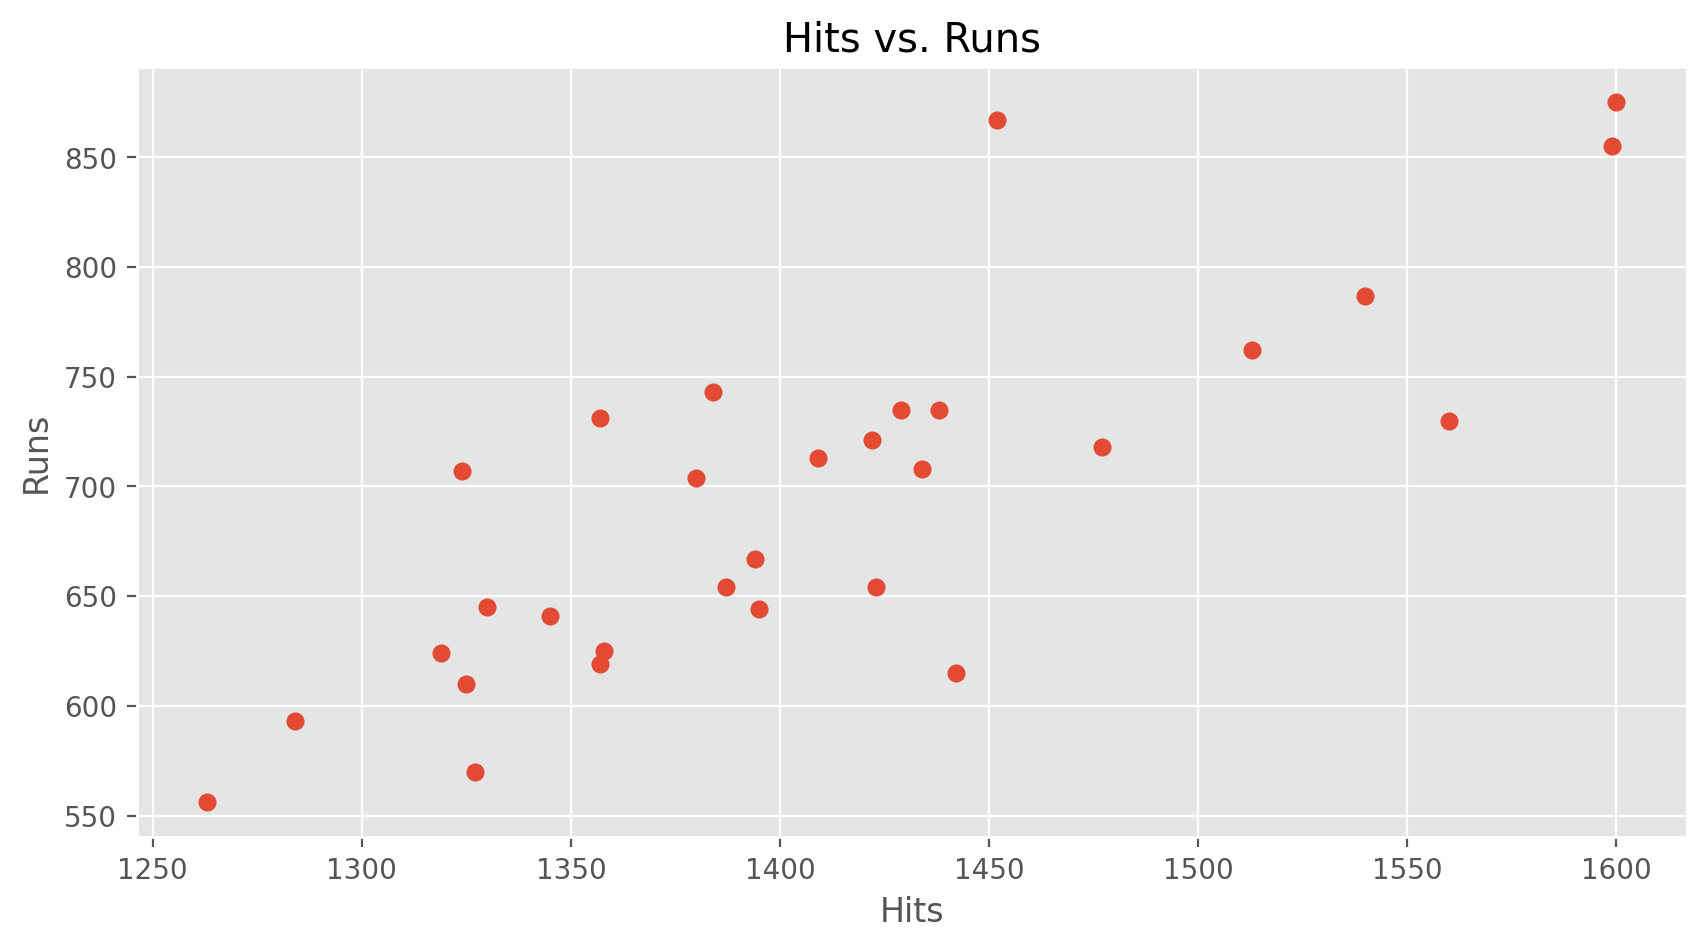

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.scatter(mlb11['hits'], mlb11['runs'])
plt.title('Hits vs. Runs')
plt.xlabel('Hits')
plt.ylabel('Runs')
#saves the plot as an image file names 'hitsrun.png'
plt.savefig('hitsruns.png')
plt.show();
#note that order matters! We must make the plot before we can label
#we also must save before we show.

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [71]:
#dataframe(y). correlation from dataframe(x)
#1 - strong positive; -1 - strong negative; 0 - no linear correlation between the variables
mlb11['runs'].corr(mlb11['at_bats']) 

0.6106270467206687

## Sum of squared residuals

Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It's also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

<div class = 'exercise'>
<h4>Exercise 2</h4>
Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.
</div>

Recall that the difference between the observed values and the values predicted by the line are called *residuals*. Note that the data set has 30 observations in total, hence there are 30 residuals.

#### ${e}$<sub>i</sub> = ${y}$<sub>i</sub>−$\bar{y}$<sub>i</sub>

To visualize the residuals of a linear regression, we can use `residplot()` function from `seaborn`:

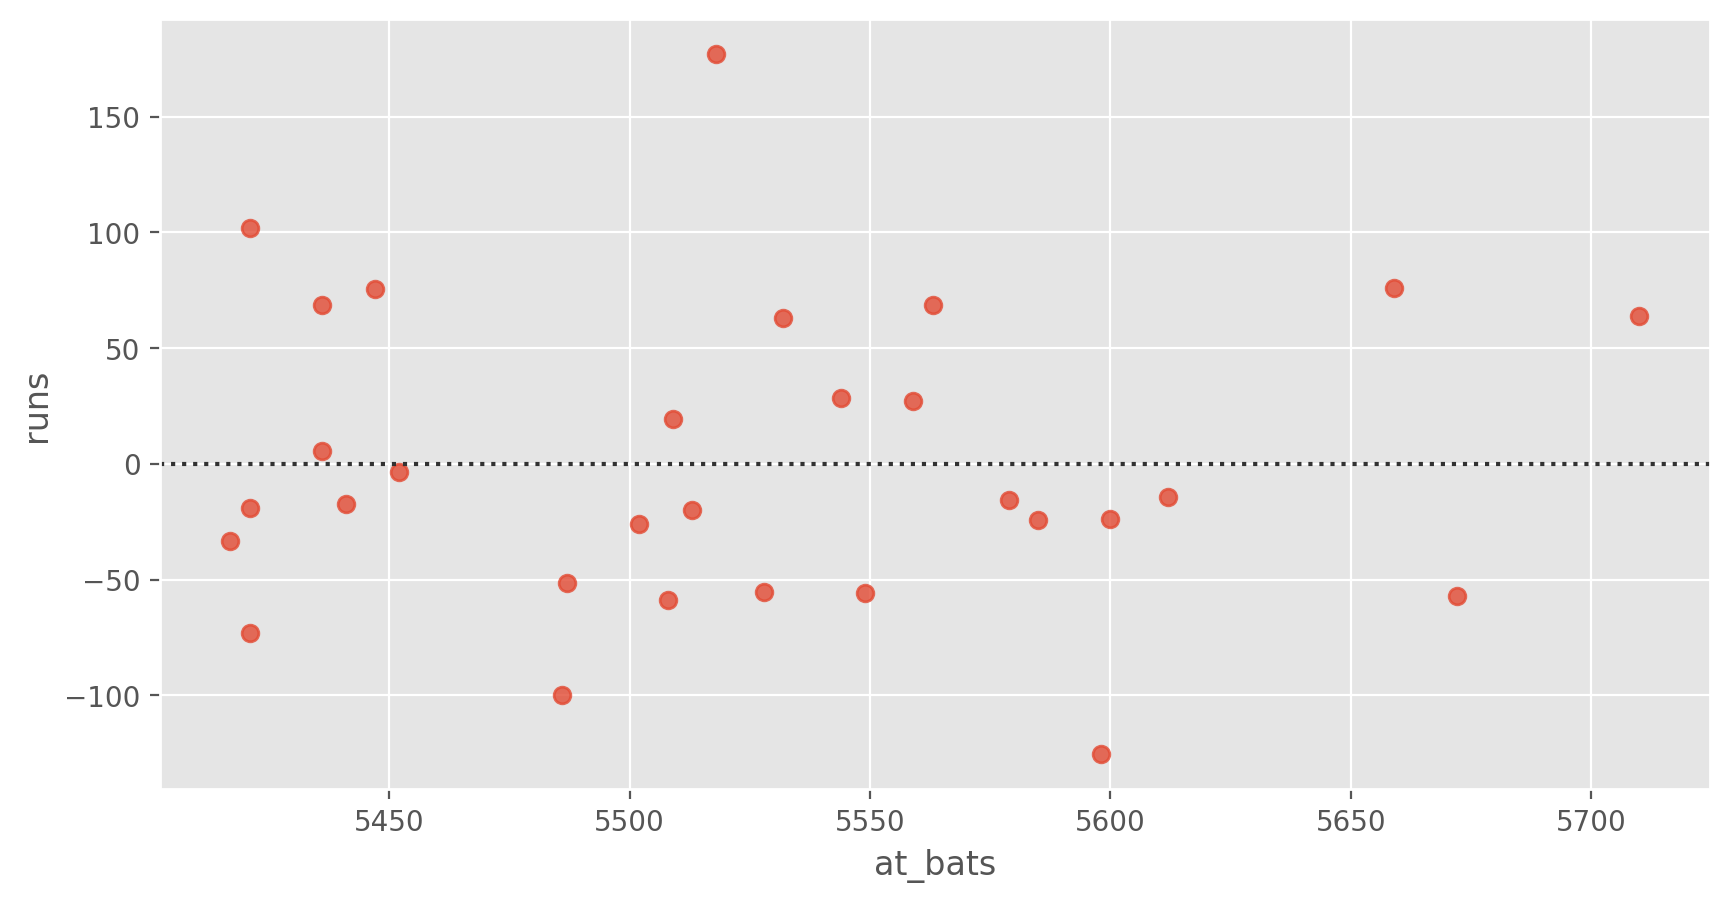

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

sns.residplot(data=mlb11, x='at_bats', y='runs')
plt.show();

## The linear model

In order to determine the best fit line we can use `statsmodel', a very useful module for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [73]:
import statsmodels.api as sm

#define the regression formula to be used
#dependent_var ~ indepdent_var
formula_string = "runs ~ at_bats"

#creates an OLS regression model using 'formula_string' and the DataFrame 'mlb11'
model = sm.formula.ols(formula = formula_string, data = mlb11)
#fit() is used to fit the OLS model to the data
#before the model remains a mere theoretical construct and after, the model is ready for evaluation
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           0.000339
Time:                        15:52:51   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

Let's print the intercept and slope values.

In [74]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = -2789.2428854422524
Slope = 0.6305499928382832


C:\Users\joych\AppData\Local\Temp\ipykernel_32948\882430664.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Intercept =', model_fitted.params[0])
C:\Users\joych\AppData\Local\Temp\ipykernel_32948\882430664.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Slope =', model_fitted.params[1])


Knowing the intercept and slope, we can write down the least squares regression line for the linear model:

#### ${y}$ = - 2789.2429 + 0.6305 x ${atbats}$

One last piece of information we will discuss from the summary output is the Multiple R-squared, or more simply, ${R}$<sup>2</sup>. The ${R}$<sup>2</sup> value represents the proportion of variability in the response variable that is explained by the explanatory variable. For this model, 37.3% of the variability in runs is explained by at-bats.

In [75]:
print('R-squared =', model_fitted.rsquared)

R-squared = 0.3728653901868054


<div class = 'exercise'>
<h4>Exercise 3</h4>
    Fit a new model that uses <code>homeruns</code> to predict <code>runs</code>. Using the estimates from the Python output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?
</div>

In [76]:
import statsmodels.api as sm

formula_string = "runs ~ homeruns"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.90e-07
Time:                        15:52:51   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.2389     41.678      9.963      0.0

In [77]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = 415.23888491572285
Slope = 1.834541619623971


C:\Users\joych\AppData\Local\Temp\ipykernel_32948\882430664.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Intercept =', model_fitted.params[0])
C:\Users\joych\AppData\Local\Temp\ipykernel_32948\882430664.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Slope =', model_fitted.params[1])


#### ${y}$ = 415.24 + 1.83 x ${homeruns}$

In [78]:
print('R-squared =', model_fitted.rsquared)

R-squared = 0.6265635695662827


## Prediction and prediction errors

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. Let's plot `homeruns` and `runs` on a scatter plot.

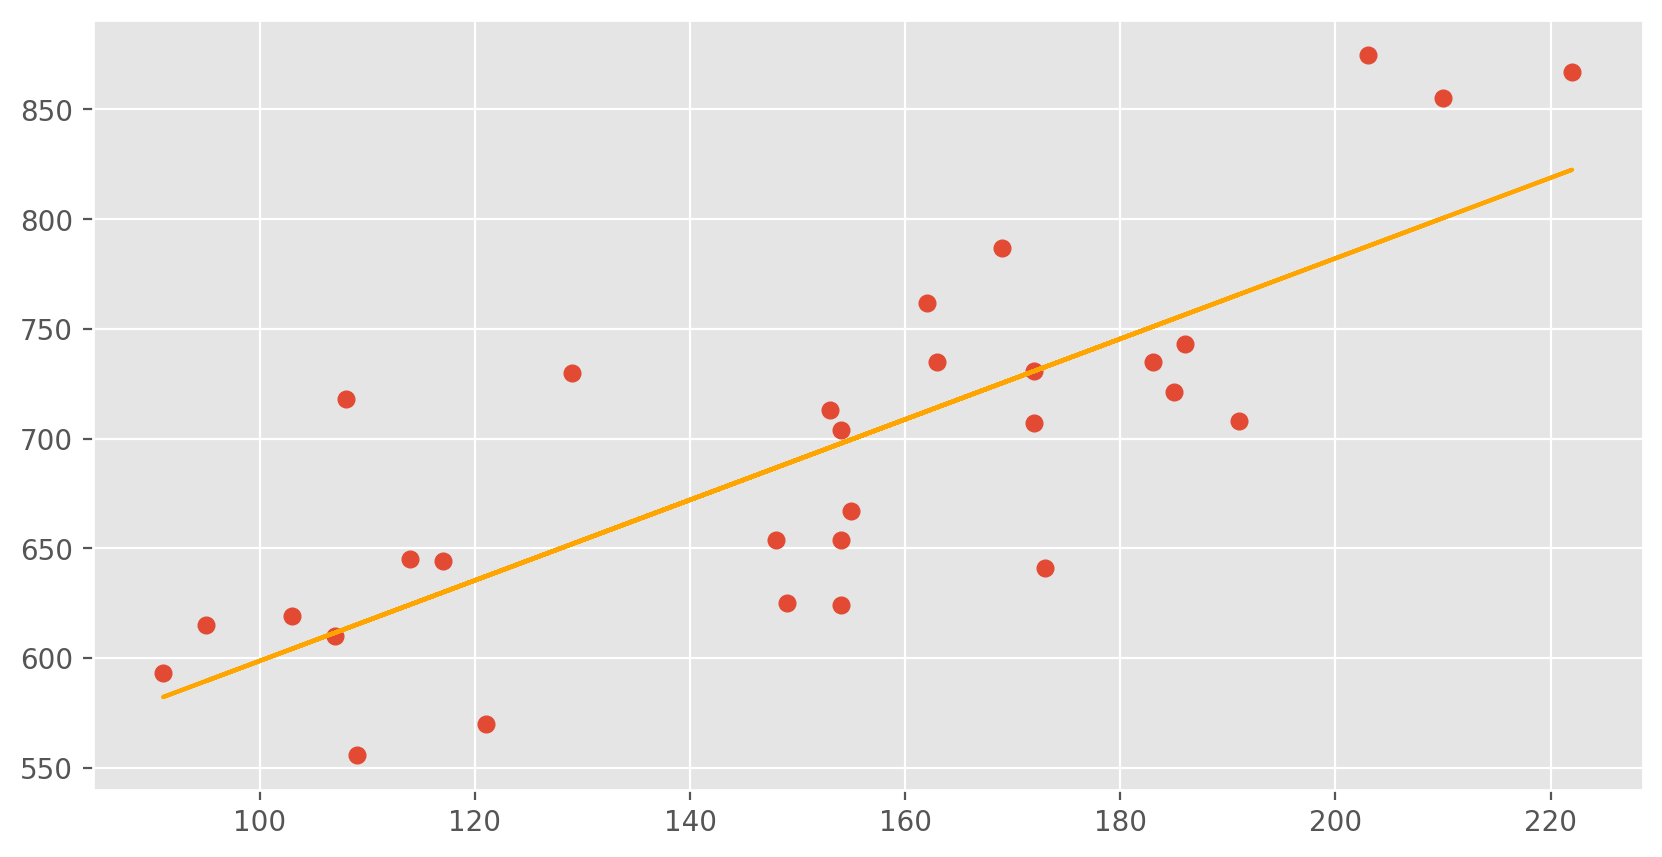

In [79]:
x = mlb11['homeruns']
y = mlb11['runs']

#use the 'predit' method of the fitted model to generate predicted values of 'y' based on the 'x'
y_pred = model_fitted.predict(x)

#plotting actual data
plt.scatter(mlb11['homeruns'], mlb11['runs'])
#plotting the predicted values against 'x', and colors the line to be orange
plt.plot(x, y_pred, color = 'orange')
plt.show();

## Model diagnostics

To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

*Linearity*: You already checked if the relationship between runs and homeruns is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. homeruns.

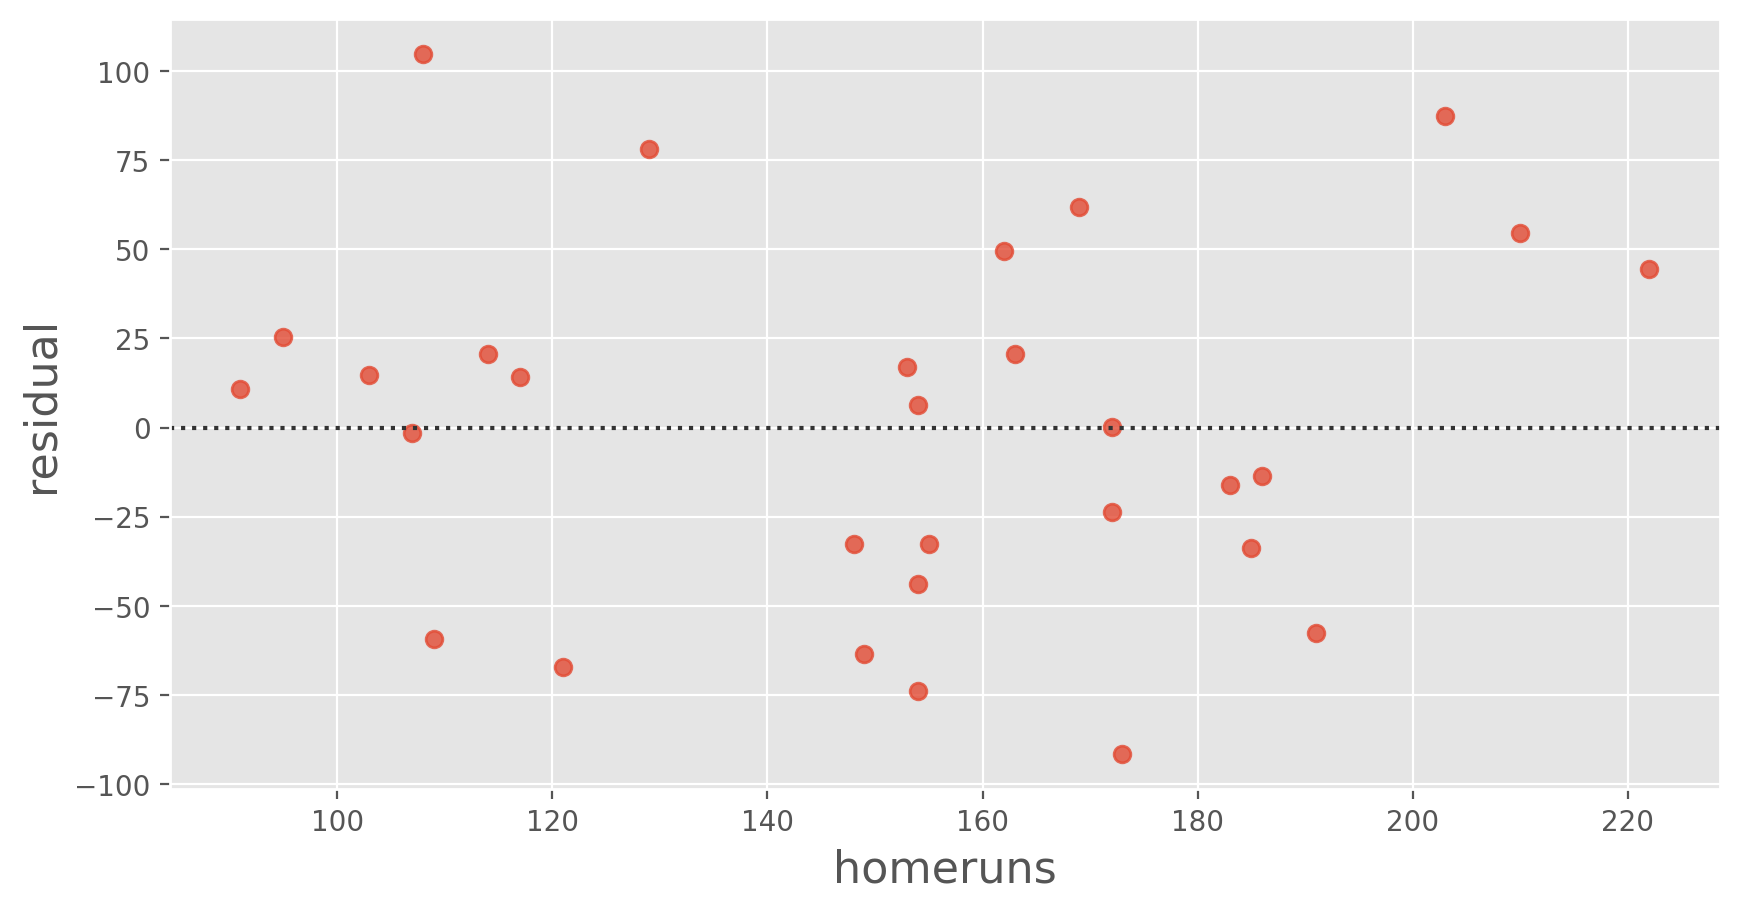

In [80]:
import seaborn as sns
sns.residplot(data=mlb11, x='homeruns', y='runs')
plt.xlabel('homeruns', fontsize = 16)
plt.ylabel('residual', fontsize = 16)
plt.show();

<div class = 'exercise'>
<h4>Exercise 4</h4>
Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?
</div>

*Nearly normal residuals*: To check this condition, we can look at a histogram.

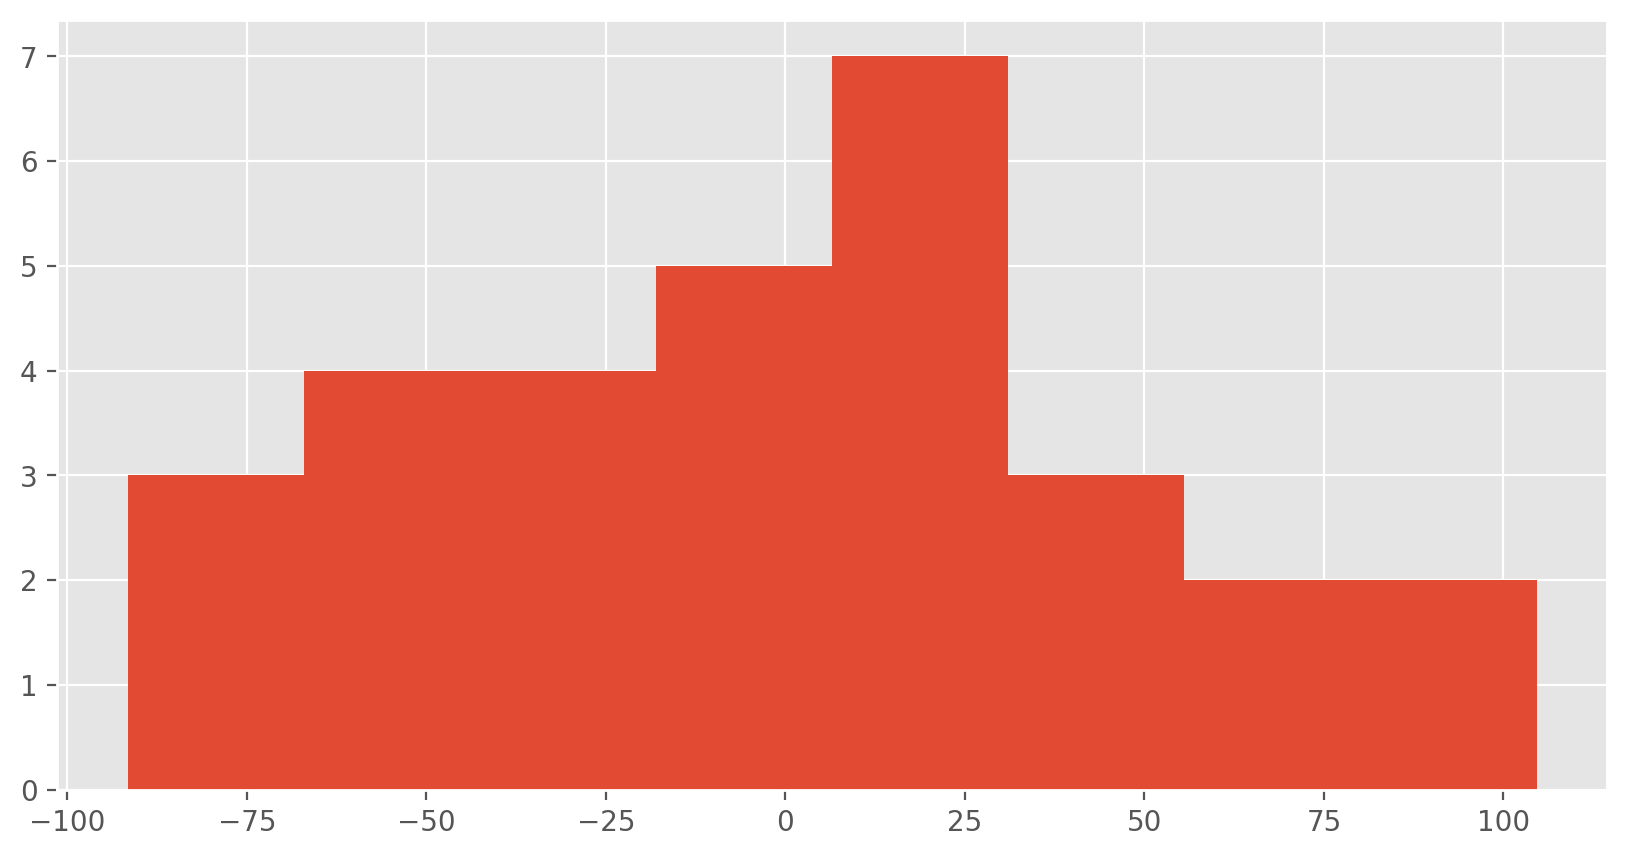

In [81]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

or a normal probability plot of the residuals.

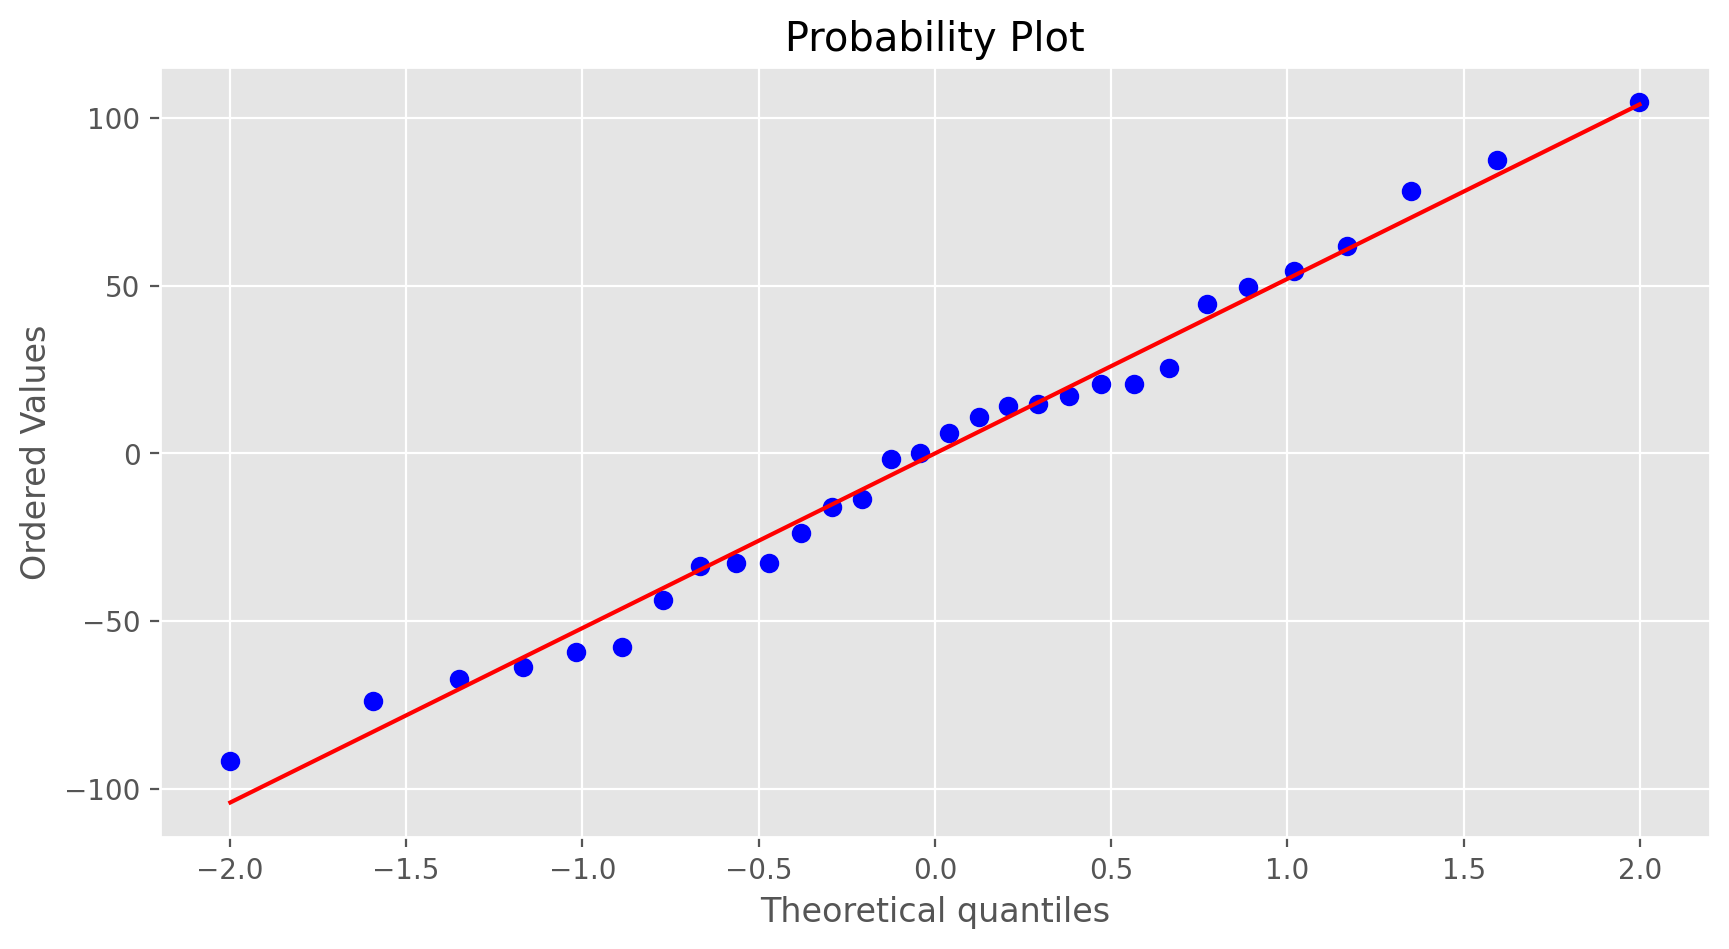

In [82]:
from scipy.stats import probplot

#creates the probability set, contain the residuals, and use matplotlib to create the plot
probplot(residuals, plot = plt)
plt.show(); 

---
## Problem Set #4 Exercises

<ol>
    <li>Choose another traditional variable from <code>mlb11</code> that you think might be a good predictor of <code>runs</code>. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?</li><br>
    <li>How does this relationship compare to the relationship between <code>runs</code> and <code>at_bats</code>? Use the R squared values from the two model summaries to compare. Does your variable seem to predict <code>runs</code> better than <code>at_bats</code>? How can you tell?</li><br>
    <li>Now that you can summarize the linear relationship between two variables, investigate the relationships between <code>runs</code> and each of the other five traditional variables. Which variable best predicts <code>runs</code>? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).</li><br>
    <li>Check the model diagnostics for the regression model with the variable you decided was the best predictor for <code>runs</code></li>
</ol>

## Question 1
Choose another traditional variable from <code>mlb11</code> that you think might be a good predictor of <code>runs</code>. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?
<li>Answer: I chose the variable batting average <code>bat_avg</code> as a good predictor of <cide>runs</code>, and I have produced the scatterplot below and fit the linear model. At a glance, it seems to me that there is a positive linear relationship betweem the two variables.</li><br>

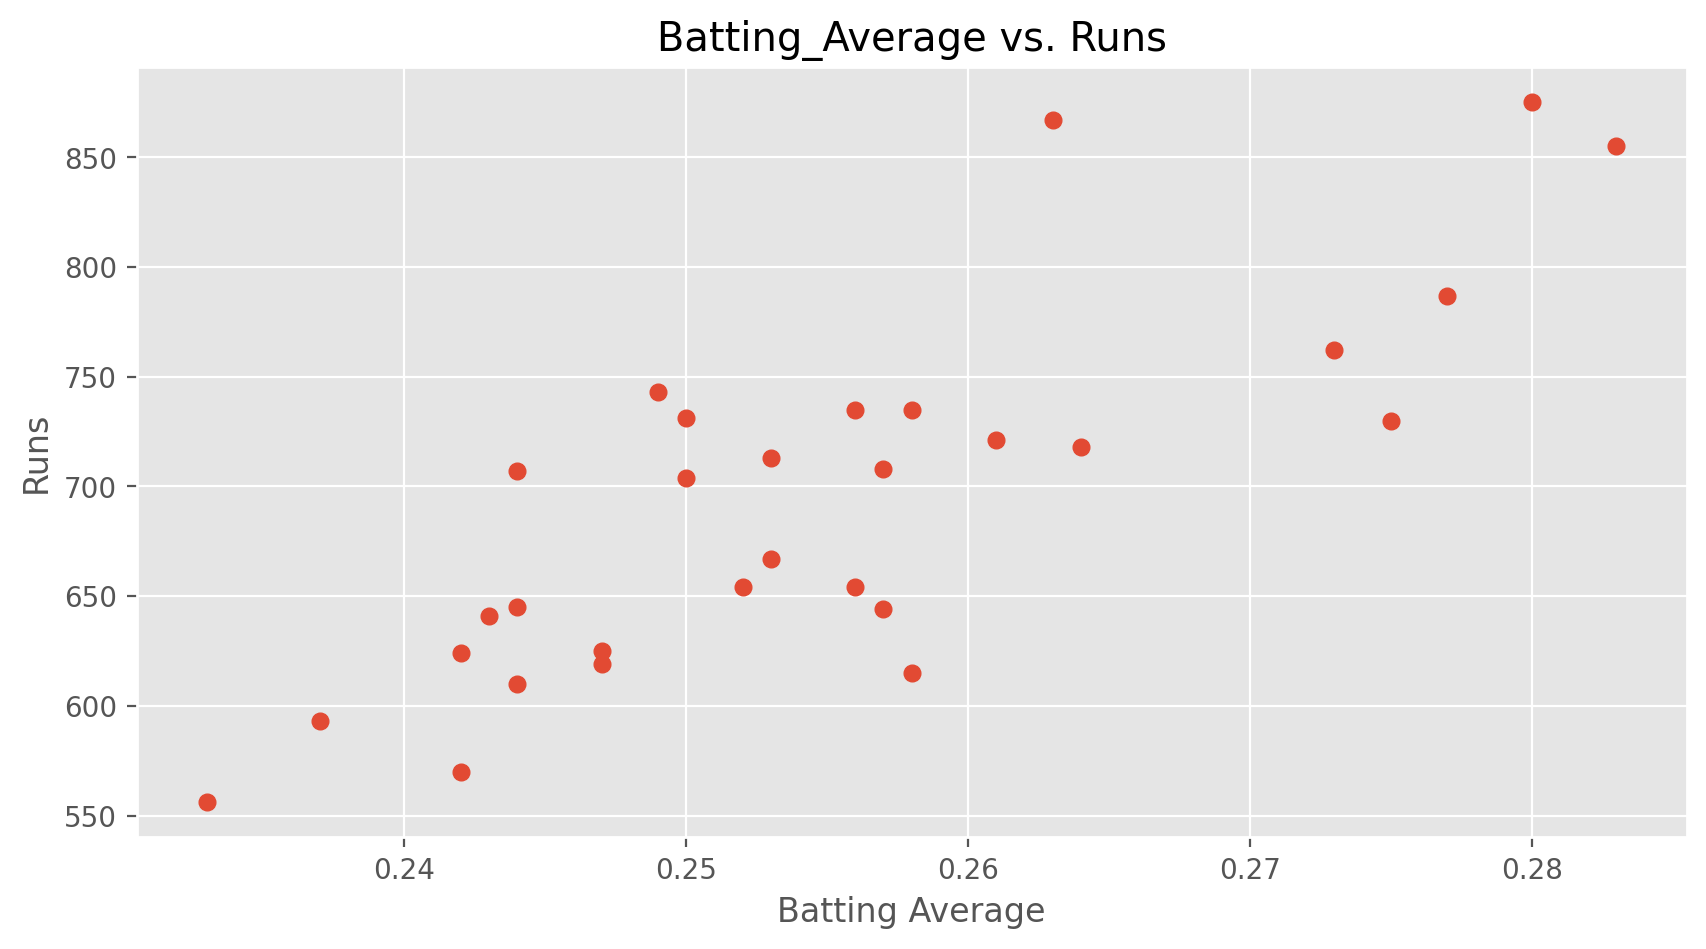

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.scatter(mlb11['bat_avg'], mlb11['runs'])
plt.title('Batting_Average vs. Runs')
plt.xlabel('Batting Average')
plt.ylabel('Runs')
#saves the plot as an image file names 'hitsrun.png'
plt.savefig('batting_avgsruns.png')
plt.show();

In [84]:
import statsmodels.api as sm

#define the regression formula to be used
#dependent_var ~ indepdent_var
formula_string_new = "runs ~ bat_avg"

#creates an OLS regression model using 'formula_string' and the DataFrame 'mlb11'
model_new = sm.formula.ols(formula = formula_string_new, data = mlb11)

#fit() is used to fit the OLS model to the data
#before the model remains a mere theoretical construct and after, the model is ready for evaluation
model_fitted_new = model_new.fit()

print(model_fitted_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     53.41
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           5.88e-08
Time:                        15:52:52   Log-Likelihood:                -158.43
No. Observations:                  30   AIC:                             320.9
Df Residuals:                      28   BIC:                             323.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -642.8189    183.080     -3.511      0.0

## Question 2
How does this relationship compare to the relationship between <code>runs</code> and <code>at_bats</code>? Use the R-squared values from the two model summaries to compare. Does your variable seem to predict <code>runs</code> better than <code>at_bats</code>? How can you tell?
<li>Answer: The R-square for the model with <code>bat_avg</code> indicates that approximately 65.6% of the variation in the dependent variable is explained by the model. The R-square for the model with <code>at_bats</code> indicates that approximately 37.2% of the variation in the dependent variable is explained by the model. This means that the model with <code>bat_avg</code> as the predictor is higher than the R-squared value for the model <code>at_bats</code> as the predictor, and it suggests that <code>bat_avg</code> explains more of the variance in <code>run</code>, which means the model with <code>bat-avg</code> is a better fit. </li><br>

In [85]:
print('R-squared of model with bat_avg = ', model_fitted_new.rsquared)
print('R-squared of model with at_bats = ', model_fitted.rsquared)

R-squared of model with bat_avg =  0.6560771346468627
R-squared of model with at_bats =  0.6265635695662827


## Question 3
Now that you can summarize the linear relationship between two variables, investigate the relationships between <code>runs</code> and each of the other five traditional variables. Which variable best predicts <code>runs</code>? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five)
<li>Answer: The best predictor of <code>runs</code> is <code>new_obs</code>. I've provided the graphical and quantitative analysis below.</li><br>

In [86]:
independent_vars = ['strikeouts', 'stolen_bases', 'new_onbase', 'new_slug', 'new_obs']
best_r_squared = 0
best_predictor = None

#creates models, fits models, and tries to find the best variable 
for var in independent_vars:
        formula_string = f"runs ~ {var}"
        model = sm.formula.ols(formula = formula_string, data = mlb11)
        model_fitted = model.fit()
        #compares individual data point ot find the best R-squared and predictor
        if model_fitted.rsquared > best_r_squared:
                best_r_squared = model_fitted.rsquared
                best_predictor = var
print(f'Best predictor: {best_predictor}')
print(f'Best R-sqaured: {best_r_squared}'+"\n")

x = mlb11[best_predictor]
y = mlb11['runs']
model_best_formula = f"runs ~ {best_predictor}"
model_best = sm.formula.ols(formula = model_best_formula, data = mlb11)
model_best_fitted = model_best.fit()
y_pred_new= model_best_fitted.predict(x)
print(model_best_fitted.summary())


Best predictor: new_obs
Best R-sqaured: 0.9349271263518136

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     402.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.76e-18
Time:                        15:52:52   Log-Likelihood:                -133.45
No. Observations:                  30   AIC:                             270.9
Df Residuals:                      28   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

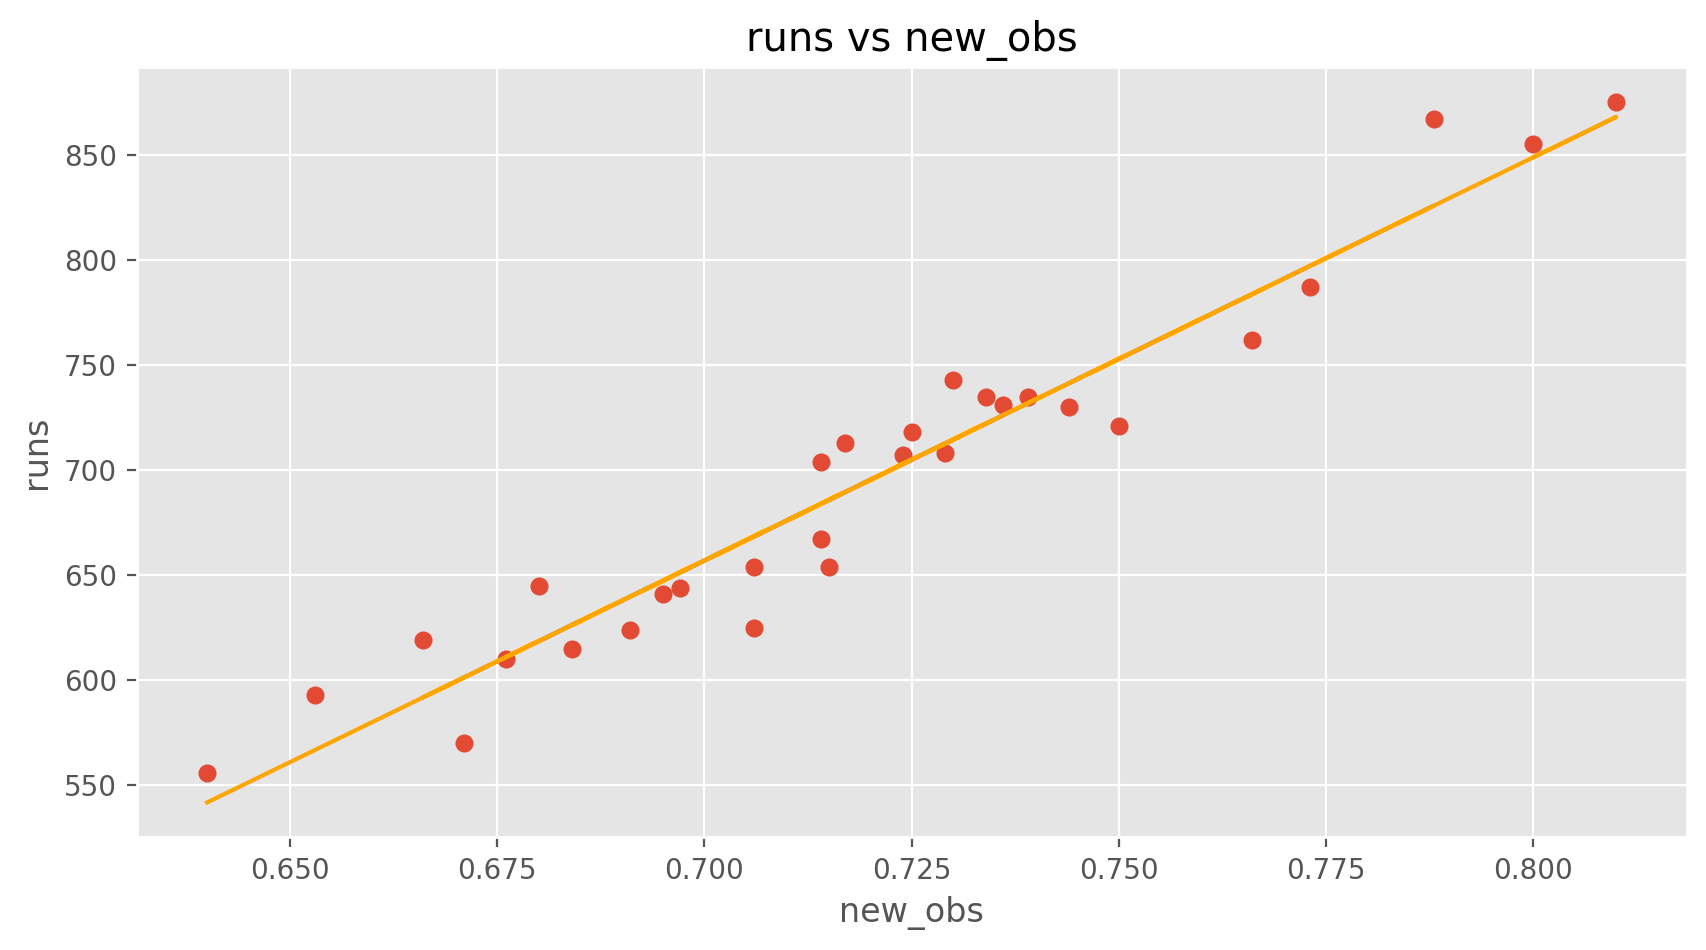

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

#plot the graph
plt.scatter(x,y)
plt.plot(x, y_pred_new, color = 'orange')
plt.title(f'runs vs {best_predictor}')
plt.xlabel(best_predictor)
plt.ylabel('runs')
plt.show()

## Question 4
Check the model diagnostics for the regression model with the variable you decided was the best predictor for <code>runs</code>
<li>Answer: Analysis is listed below to check the model diagnostics</li><br>

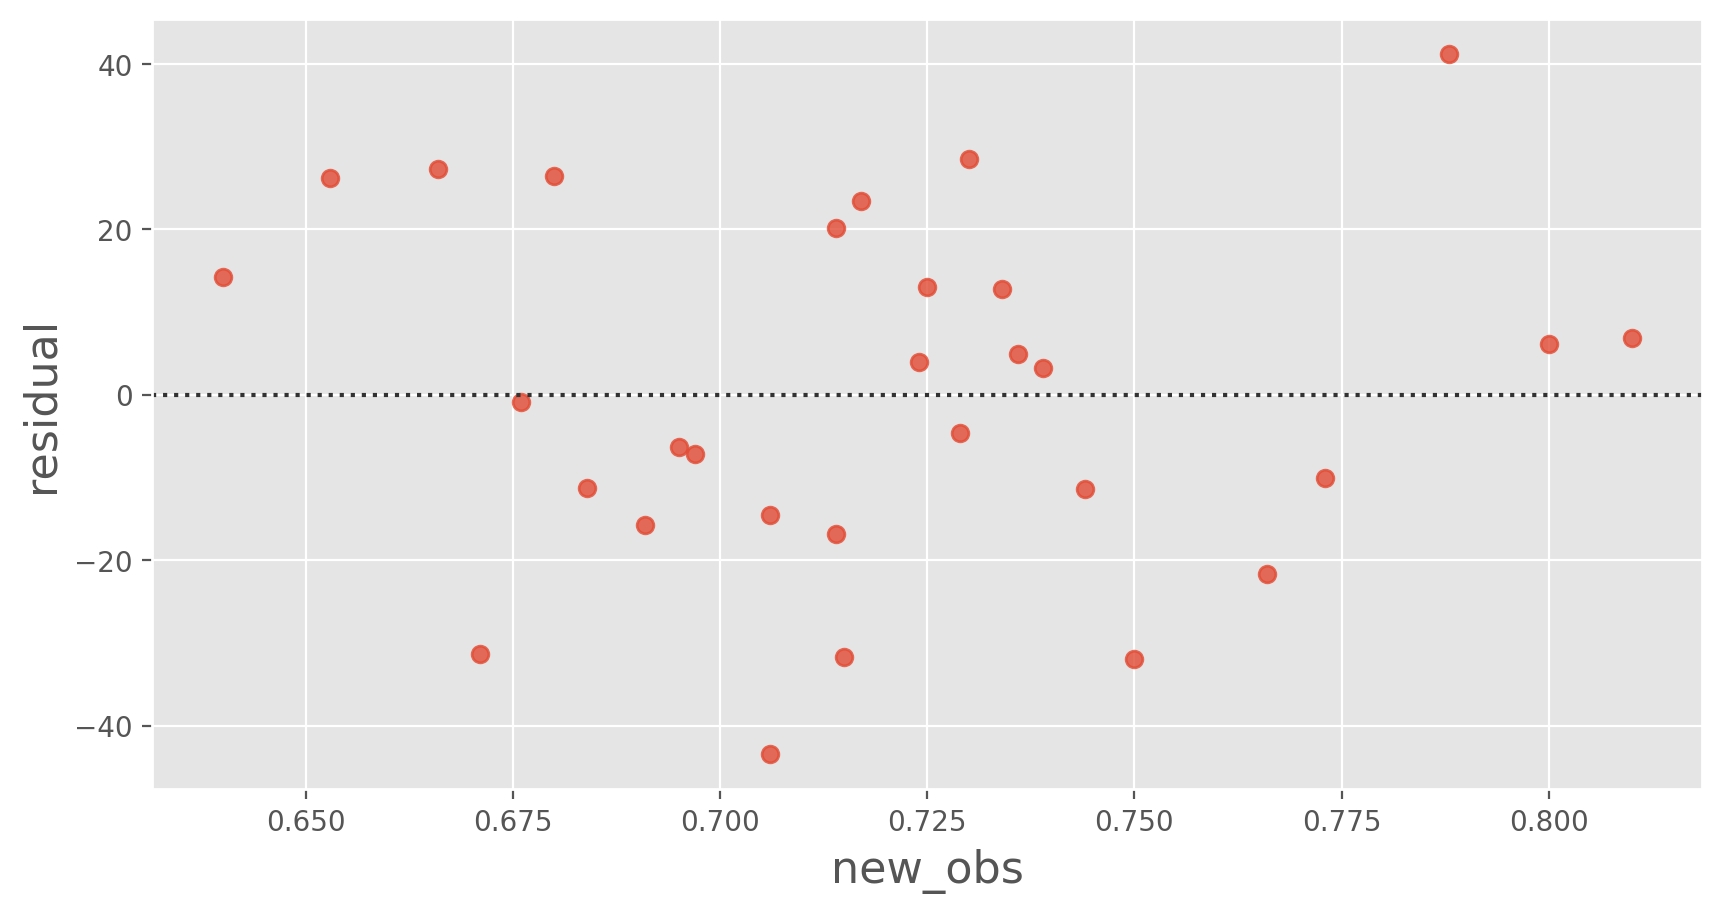

In [88]:
sns.residplot(data = mlb11, x = 'new_obs', y='runs')
plt.xlabel('new_obs', fontsize = 16)
plt.ylabel('residual', fontsize = 16)
plt.show();

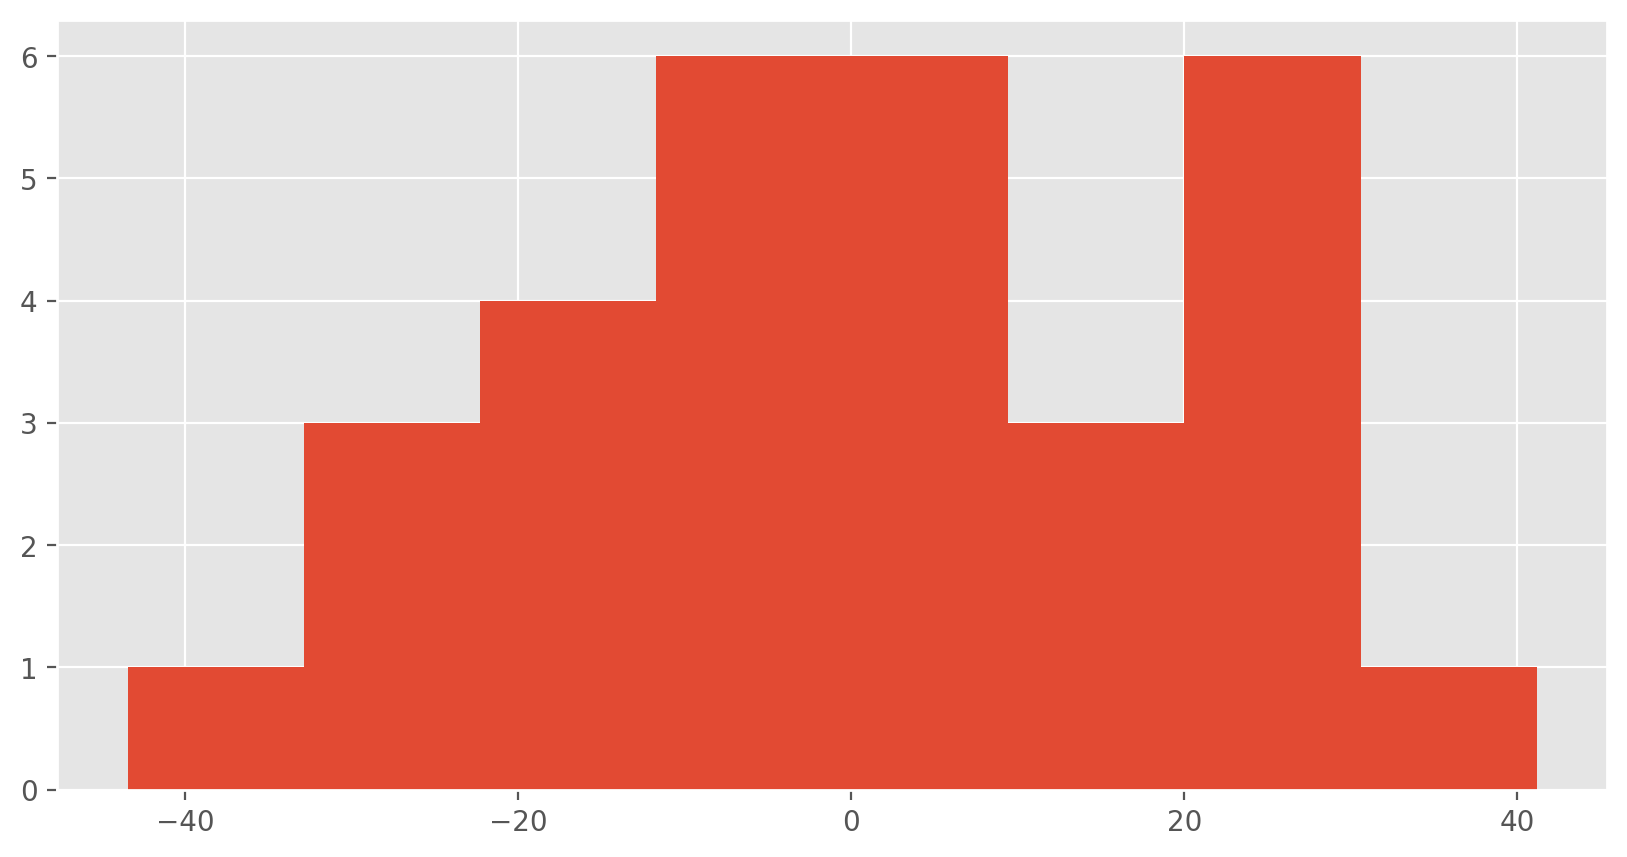

In [89]:
residuals = (y - y_pred_new)
plt.hist(residuals, bins = 8)
plt.show();

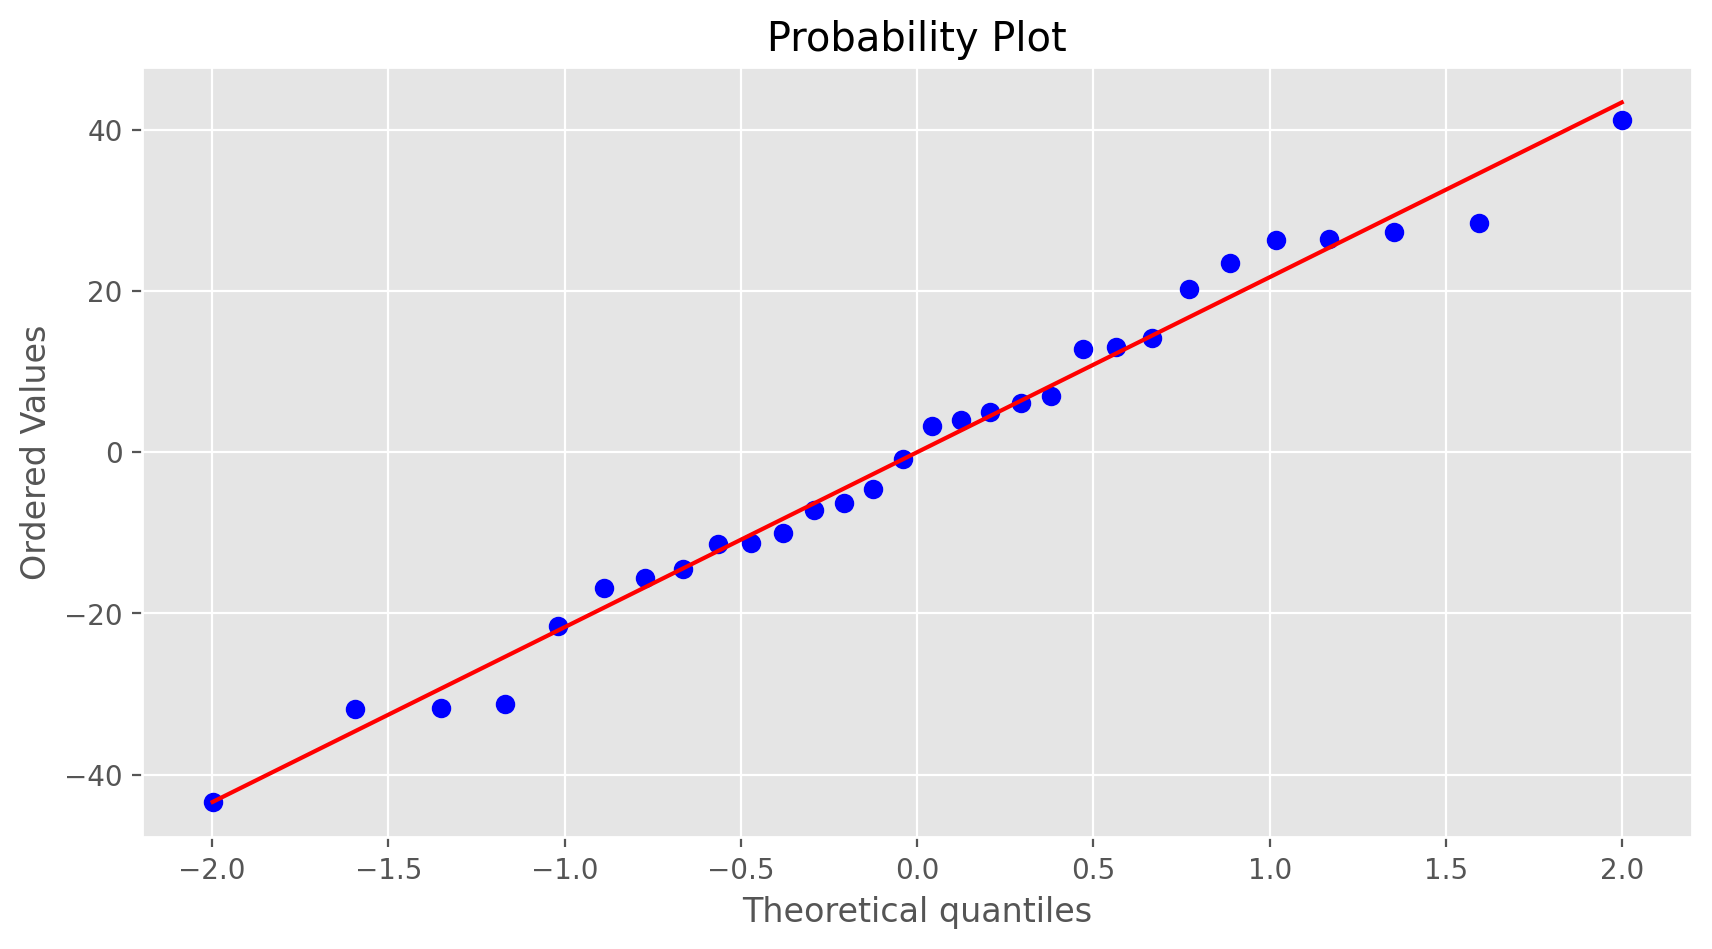

In [90]:
from scipy.stats import probplot

#creates the probability set, contain the residuals, and use matplotlib to create the plot
probplot(residuals, plot = plt)
plt.show(); 